In [3]:
import pandas as pd

In [4]:
avengers = pd.read_csv('avengers.csv',encoding = "ISO-8859-1")
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [177]:
import matplotlib.pyplot as plt
import numpy as np

(array([14.,  0.,  0.,  0.,  0., 14., 18., 31., 17., 79.]),
 array([1900. , 1911.5, 1923. , 1934.5, 1946. , 1957.5, 1969. , 1980.5,
        1992. , 2003.5, 2015. ]),
 <a list of 10 Patch objects>)

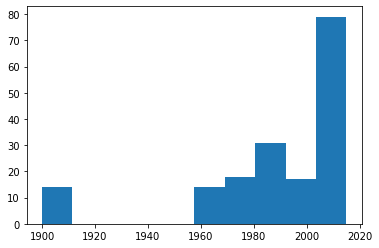

In [8]:
plt.hist(avengers.Year)

In [14]:
true_avengers = avengers[avengers.Year > 1960]

**method 1**

In [101]:
def count_deaths(i):
    total_death = 0
    for column in true_avengers.columns[true_avengers.columns.str.contains(r"Death")]:
        death = i[column]
        if pd.isnull(death) or death == 'NO':
            continue
        else:
            total_death += 1
    return total_death

In [182]:
true_avengers['Deaths'].head()

0    1
1    1
2    1
3    1
4    2
Name: Deaths, dtype: int64

**method 2**

In [154]:
columns = true_avengers.columns[true_avengers.columns.str.contains(r"Death")].tolist()
total_deaths = []
for d1,d2,d3,d4,d5 in zip(true_avengers[columns[0]],true_avengers[columns[1]],true_avengers[columns[2]],true_avengers[columns[3]],true_avengers[columns[4]]):
    row = [d1,d2,d3,d4,d5]
    if 'YES' in row:
        death_count = row.count('YES')
        total_deaths.append(death_count)
    else:
        death_count = 0
        total_deaths.append(death_count)
print(total_deaths)

[1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 5, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [186]:
true_avengers[true_avengers.columns[true_avengers.columns.str.contains(r"Year")]]

,Year,Years since joining
0,1963,52
1,1963,52
2,1963,52
3,1963,52
4,1963,52
...,...,...
168,2013,2
169,2014,1
170,2014,1
171,2014,1


In [202]:
len(true_avengers[true_avengers['Year'].apply(lambda x:2015-x) == true_avengers['Years since joining']])

159